In [44]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

In [80]:
air_dataset=pd.read_excel('/content/AirQualityUCI.xlsx')

In [81]:
air_dataset

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [82]:
air_dataset.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [83]:
air_data=air_dataset.replace(to_replace=-200,value=np.NaN)

In [84]:
air_data.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [85]:
air_data.dropna(axis=0,inplace=True)

In [86]:
air_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,2004-04-30,20:00:00,4.4,1449.25,501.0,19.494597,1282.25,254.0,625.00,133.0,2099.50,1568.50,19.075,61.075001,1.334500
1227,2004-04-30,21:00:00,3.1,1362.50,234.0,15.100351,1151.75,189.0,683.75,110.0,1951.25,1494.75,18.200,65.350002,1.352888
1228,2004-04-30,22:00:00,3.0,1371.25,212.0,14.594739,1135.75,174.0,689.00,102.0,1926.75,1471.25,18.075,66.100000,1.357869
1229,2004-04-30,23:00:00,3.1,1406.25,275.0,13.697100,1106.75,167.0,718.25,108.0,1871.50,1383.75,17.700,66.875000,1.342218


In [87]:
air_data.shape

(827, 15)

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler=MinMaxScaler()
X=air_data.drop(['Date', 'Time','AH'], axis=1)
X=scaler.fit_transform(X)

In [90]:
Y=air_data.AH

In [91]:
X

array([[0.29487179, 0.4719363 , 0.12098139, ..., 0.47936053, 0.30874605,
        0.49725579],
       [0.21794872, 0.41930472, 0.08883249, ..., 0.33846337, 0.29610116,
        0.48005855],
       [0.24358974, 0.50456399, 0.06852792, ..., 0.3870198 , 0.23709168,
        0.57189903],
       ...,
       [0.34615385, 0.48067586, 0.17343486, ..., 0.5765927 , 0.49736564,
        0.7493597 ],
       [0.35897436, 0.5078656 , 0.22673435, ..., 0.53483655, 0.48155953,
        0.76070254],
       [0.41025641, 0.52204312, 0.22673435, ..., 0.72810785, 0.48472076,
        0.75887308]])

In [92]:
Y

0       0.757754
1       0.725487
2       0.750239
3       0.786713
4       0.788794
          ...   
1226    1.334500
1227    1.352888
1228    1.357869
1229    1.342218
1230    1.345960
Name: AH, Length: 827, dtype: float64

In [93]:
X.shape

(827, 12)

In [94]:
from sklearn.decomposition import PCA

In [146]:
pca = PCA(n_components=1)
X_new = pca.fit_transform(X)

In [147]:
pca.get_covariance()

array([[ 0.04020937,  0.03028095,  0.02630723,  0.03183798,  0.03416663,
         0.02789694, -0.02760392,  0.02713717,  0.02850118,  0.03010042,
         0.01559318, -0.0069443 ],
       [ 0.03028095,  0.04171217,  0.02696813,  0.03263782,  0.03502497,
         0.02859777, -0.02829739,  0.02781891,  0.02921719,  0.03085661,
         0.01598492, -0.00711876],
       [ 0.02630723,  0.02696813,  0.03409964,  0.02835481,  0.0304287 ,
         0.02484493, -0.02458397,  0.02416828,  0.02538307,  0.02680735,
         0.01388724, -0.00618457],
       [ 0.03183798,  0.03263782,  0.02835481,  0.04498653,  0.03682593,
         0.03006825, -0.02975243,  0.02924935,  0.03071952,  0.03244324,
         0.01680685, -0.0074848 ],
       [ 0.03416663,  0.03502497,  0.0304287 ,  0.03682593,  0.0501899 ,
         0.03226746, -0.03192854,  0.03138866,  0.03296637,  0.03481616,
         0.01803612, -0.00803224],
       [ 0.02789694,  0.02859777,  0.02484493,  0.03006825,  0.03226746,
         0.03701677, -

In [148]:
X_new.shape

(827, 1)

In [149]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.72766747])

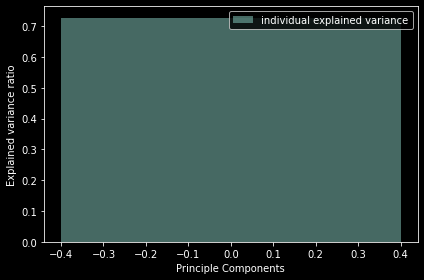

In [150]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(6,4))
  plt.bar(range(1), explained_variance, alpha=0.5, align = 'center', label = 'individual explained variance')
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principle Components')
  plt.legend(loc='best')
  plt.tight_layout()

In [152]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(144,input_shape=(1,),activation='relu'))

model.add(Dense(288,activation='relu'))
model.add(Dense(288,activation='relu'))
model.add(Dense(144,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(Adam(lr=0.01),loss='mse', metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 144)               288       
_________________________________________________________________
dense_1 (Dense)              (None, 288)               41760     
_________________________________________________________________
dense_2 (Dense)              (None, 288)               83232     
_________________________________________________________________
dense_3 (Dense)              (None, 144)               41616     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 145       
Total params: 167,041
Trainable params: 167,041
Non-trainable params: 0
_________________________________________________________________


In [151]:
import keras
keras.backend.clear_session() 

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.3, random_state=2)

In [154]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
19/19 [==============================] - 0s 3ms/step - loss: 0.2404 - mse: 0.2404
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0336 - mse: 0.0336
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0319 - mse: 0.0319
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0313 - mse: 0.0313
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0291 - mse: 0.0291
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0290 - mse: 0.0290
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0284 - mse: 0.0284
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0288 - mse: 0.0288
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0290 - mse: 0.0290
Epoch 10/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0294 - mse: 0.0294
Epoch 11/100
19/19 [==============================] - 0s 3m

loss: 4.0620e-05 - mse: 4.0620e-05

for 12 components



loss: 4.8324e-05 - mse: 4.8324e-05

for 10 components

 loss: 4.6547e-05 - mse: 4.6547e-05 
 
 for 8 components 

loss: 0.0023 - mse: 0.0023

for 4 components

loss: 0.0242 - mse: 0.0242

for 2 components 

loss: 0.0287 - mse: 0.0287

for single component

Here we can see as we are removing components accuracy decreases gradually 